In [ ]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Data Collection & Analysis

In [ ]:
# loading the dataset from csv to pandas dataframe
big_mart_data = pd.read_csv('/content/Train.csv')

In [ ]:
# number of datapoints and no of features
big_mart_data['Item_Fat_Content'].duplicated()

0       False
1       False
2        True
3        True
4        True
        ...  
8518     True
8519     True
8520     True
8521     True
8522     True
Name: Item_Fat_Content, Length: 8523, dtype: bool

In [ ]:
# info about the dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data.drop(columns = 'Item_Identifier', inplace = True)
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



Categorical features:we have on our dataset

*   Item_Identifier
*   Item_Fat_Content
*   Item_type
*   Outlet_Identifier
*   Outlet_size
*   Outlet_location_type
*   Outlet_type









In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling the missing values

:we will impute the value with mean(Item_weight) and mode(Outlet_size).


Mean --> avg value

Mode --> most repeated values

In [ ]:
# mean value of "item_weight"
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in "item_weight" with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True )

Replacing the missing values in 'Outlet_size' with mode

In [ ]:
# Replace missing values in 'Outlet_Size' column with mode
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))


In [ ]:
# Drop rows with missing values
big_mart_data.dropna(axis=0, inplace=True)


In [ ]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
 # missing values
# missing_values = big_mart_data['Outlet_Size'].isnull()

In [ ]:
# replacing missing values
# big_mart_data.loc[missing_values, 'Outlet_Size']  = big_mart_data.loc[missing_values,'Outlet_Size'].apply(lambda x: mode_of_outlet_size)

In [ ]:
big_mart_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
# Check if missing values in 'Outlet_Size' are replaced
print(big_mart_data['Outlet_Size'].isnull().sum())

0


Data Analysis

In [ ]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [ ]:
sns.set()

In [ ]:
# # item_weight distribution
# plt.figure(figsize = (6,6))
# sns.distplot(big_mart_data['Item_Weight'])
# plt.show()

In [ ]:
# # item_visibillity distribution
# plt.figure(figsize = (6,6))
# sns.distplot(big_mart_data['Item_Visibility'])
# plt.show()

In [ ]:
# # item_MRP distribution
# plt.figure(figsize = (6,6))
# sns.distplot(big_mart_data['Item_MRP'])
# plt.show()

In [ ]:
# # item_Outlet_sales distribution
# plt.figure(figsize = (6,6))
# sns.distplot(big_mart_data['Item_Outlet_Sales'])
# plt.show()

In [ ]:
# # outlet establishment here we will use countplot as it is better
# plt.figure(figsize = (6,6))
# sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data )
# plt.show()

Categorical features


In [ ]:
# # categorical feature of low fat content
# plt.figure(figsize = (6,6))
# sns.countplot(x = 'Item_Fat_Content', data = big_mart_data )
# plt.show()

In [ ]:
big_mart_data['Item_Type'] = big_mart_data['Item_Type'].astype('category')

In [ ]:
big_mart_data['Item_Type'].dtype

CategoricalDtype(categories=['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
                  'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
                  'Health and Hygiene', 'Household', 'Meat', 'Others',
                  'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
, ordered=False)

In [ ]:
# # item_type columns
# plt.figure(figsize = (30,6))
# sns.countplot(x = 'Item_Type', data = big_mart_data )
# plt.show()

In [ ]:
big_mart_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# # Outlet_Size columns
# plt.figure(figsize = (6,6))
# sns.countplot(x='Outlet_Size', data = big_mart_data )
# plt.title('Item Type count')
# plt.show()

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: Item_Fat_Content, dtype: int64

In [ ]:
# replcace the fat values
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [ ]:
# # dropping the item identifier
# big_mart_data = big_mart_data.drop(columns='Item_Identifier', inplace =True)
# big_mart_data.head()

Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
# # we are encoding all the labels of categorical data
# big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [ ]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,6,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,6,1999,1,0,1,2097.2700
4,8.930,0,0.000000,9,53.8614,0,1987,0,2,1,994.7052
5,10.395,1,0.000000,0,51.4008,1,2009,1,2,2,556.6088


Splitting feature and target

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis= 1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,6,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,1,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,6,1999,1,0,1
4,8.930,0,0.000000,9,53.8614,0,1987,0,2,1
5,10.395,1,0.000000,0,51.4008,1,2009,1,2,2
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,5,1997,2,0,1
8518,6.865,0,0.056783,13,214.5218,0,1987,0,2,1
8520,10.600,0,0.035186,8,85.1224,4,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,1,2009,1,2,2


In [ ]:
Y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6113, dtype: float64

In [ ]:
# splitting the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

Machine learning model training

In [ ]:
regressor = XGBRegressor()

In [ ]:
print(X_train)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
899      7.475000                 0         0.013120          9  217.6192   
3154    12.857645                 0         0.049066         13  192.4478   
2923    20.750000                 0         0.021232         14  151.1024   
4155    13.350000                 0         0.102426          4  230.6352   
4623    18.250000                 0         0.044213          7  173.4080   
...           ...               ...              ...        ...       ...   
1547    15.700000                 0         0.161317          9   57.5562   
3525    11.850000                 1         0.000000          0   51.2666   
5064    20.500000                 0         0.036353          5   75.8696   
7953    12.857645                 1         0.019913          5   91.0488   
3615    10.000000                 1         0.063122          5  231.7668   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
899     

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [ ]:
# prediction on training data

training_data_prediction = regressor.predict(X_train)


R sqaure predict how close is the value as compared to actual. generally more than 7 is cosnsidered as good.

In [ ]:
# R squared value
r2_train = r2_score(Y_train, training_data_prediction)
print(r2_train)

0.8996303138488337


In [ ]:
# prediction on test data

test_data_prediction = regressor.predict(X_test)

# R squared value
r2_train = r2_score(Y_test, test_data_prediction)

print(r2_train)

0.5030237926912655


In [ ]:
# model evaluation
mean_squared_error(Y_test, test_data_prediction)

1512560.1982141028

In [ ]:
mean_absolute_error(Y_test, test_data_prediction)

882.5712664145892

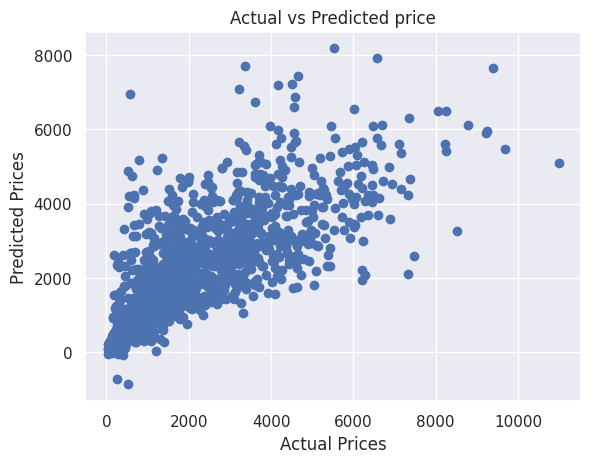

In [ ]:
# ḍata viualization
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted price")
plt.show()

Hyperparameter tuning for XGBRegressor

RandomizedSearchCV

In [ ]:
parameters = {
      'learning_rate': [0.05, 0.1, 0.15],   # Step size at each boosting iteration
      'n_estimators': [100, 200, 300],      # Number of boosting rounds (trees)
      'max_depth': [3, 4, 5],               # Maximum depth of each tree
      'gamma': [0.0, 0.1, 0.2],             # Minimum loss reduction required to make a further partition on a leaf node
      'reg_alpha': [0.0, 0.01, 0.1],        # L1 regularization term on weights
      'reg_lambda': [0.0, 0.01, 0.1]        # L2 regularization term on weights
}

In [ ]:
xgb = XGBRegressor()

In [ ]:
# Random search
Random_search = RandomizedSearchCV(estimator=xgb, param_distributions = parameters, cv = 5, random_state = 42)

In [ ]:
Random_search.fit(X,Y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'gamma': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.05, 0.1, 0.15],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0.0, 0.01, 0.1],
                                        'reg_lambda': [0.0, 0.01, 0.1]},
                   random_state=42)

In [ ]:
# best parameters
best_params = Random_search.best_params_
best_params

{'reg_lambda': 0.1,
 'reg_alpha': 0.0,
 'n_estimators': 100,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.2}

In [ ]:
# highest accuracy
highest_accuracy = Random_search.best_score_
highest_accuracy

0.5849268565925277

In [ ]:
# loading the result into dataframe
results = pd.DataFrame(Random_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.357003,0.172454,0.015352,0.009207,0.0,0.0,200,5,0.15,0.1,"{'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estim...",0.544178,0.489459,0.468345,0.501993,0.533367,0.507468,0.027940,10
1,0.209540,0.012576,0.008217,0.000122,0.01,0.01,200,5,0.1,0.0,"{'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_est...",0.575083,0.500708,0.507895,0.533574,0.548295,0.533111,0.027123,9
2,0.122399,0.006091,0.007061,0.001004,0.1,0.01,100,5,0.05,0.1,"{'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_esti...",0.594125,0.559347,0.554510,0.585110,0.597891,0.578196,0.017921,4
3,0.079392,0.002042,0.005862,0.000221,0.01,0.01,100,4,0.1,0.1,"{'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_est...",0.591740,0.562519,0.554943,0.582512,0.590374,0.576418,0.014974,5
4,0.081738,0.001415,0.006679,0.001887,0.1,0.0,100,4,0.05,0.2,"{'reg_lambda': 0.1, 'reg_alpha': 0.0, 'n_estim...",0.597255,0.572113,0.564351,0.590601,0.600314,0.584927,0.014202,1
5,0.159020,0.011238,0.007394,0.000053,0.1,0.01,300,3,0.05,0.1,"{'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_esti...",0.597006,0.561508,0.559359,0.583498,0.595395,0.579353,0.016151,3
6,0.646530,0.276280,0.014938,0.009104,0.0,0.0,300,5,0.05,0.0,"{'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estim...",0.581200,0.528354,0.520326,0.547286,0.565286,0.548491,0.022593,7
7,0.066681,0.009620,0.005333,0.000110,0.0,0.0,100,3,0.1,0.0,"{'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estim...",0.598347,0.566761,0.566172,0.587379,0.598940,0.583520,0.014521,2
8,0.210078,0.010878,0.009430,0.001012,0.01,0.1,300,4,0.1,0.0,"{'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_esti...",0.575092,0.514033,0.519187,0.546790,0.560969,0.543214,0.023550,8
9,0.154032,0.004460,0.008848,0.001506,0.0,0.0,300,3,0.1,0.1,"{'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estim...",0.581571,0.543917,0.540150,0.566468,0.577874,0.561996,0.017085,6


In [ ]:
randomized_search_result = results[['param_n_estimators','param_learning_rate','rank_test_score']]
randomized_search_result

,param_n_estimators,param_learning_rate,rank_test_score
0,200,0.15,10
1,200,0.1,9
2,100,0.05,4
3,100,0.1,5
4,100,0.05,1
5,300,0.05,3
6,300,0.05,7
7,100,0.1,2
8,300,0.1,8
9,300,0.1,6


In [ ]:
# again training with best parameters
model_best_para =  XGBRegressor(reg_lambda= 0.1, reg_alpha= 0.0, n_estimators = 100,max_depth = 4,learning_rate= 0.05,gamma =  0.2)

In [ ]:
model_best_para.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred= model_best_para.predict(X_test)
pred

array([3347.438 , 1262.4045, 3897.04  , ...,  477.6287, 4491.935 ,
       1110.3606], dtype=float32)

In [ ]:
# r_2 score
r2_train = r2_score(Y_test, pred)
print(r2_train)
mae=mean_absolute_error(Y_test, pred )
print(mae)
mse =mean_squared_error(Y_test,pred )
print(mse)

0.5880231768096418
804.4807531546643
1253862.3301886043


In [ ]:
print(X_train)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
899      7.475000                 0         0.013120          9  217.6192   
3154    12.857645                 0         0.049066         13  192.4478   
2923    20.750000                 0         0.021232         14  151.1024   
4155    13.350000                 0         0.102426          4  230.6352   
4623    18.250000                 0         0.044213          7  173.4080   
...           ...               ...              ...        ...       ...   
1547    15.700000                 0         0.161317          9   57.5562   
3525    11.850000                 1         0.000000          0   51.2666   
5064    20.500000                 0         0.036353          5   75.8696   
7953    12.857645                 1         0.019913          5   91.0488   
3615    10.000000                 1         0.063122          5  231.7668   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
899     

Building the predicting system

In [ ]:
input_data = (12.857645,0,0.049066, 13,192.4478,3,1985,1,2,3)

#  change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_best_para.predict(input_data_reshaped)

print(prediction)

[5521.75]


Saving the trained model

In [ ]:
import joblib

In [ ]:
filename = 'big.sav'
joblib.dump(model_best_para, open(filename,'wb'))

In [ ]:
# loading the saved model
loaded_big_model = joblib.load(open('big_mart.sav','rb'))

In [ ]:
loaded_big_model.predict(X_test)

array([3347.438 , 1262.4045, 3897.04  , ...,  477.6287, 4491.935 ,
       1110.3606], dtype=float32)